# Indian Elections - 2019


![](https://d2c7ipcroan06u.cloudfront.net/wp-content/uploads/2019/05/2019-696x392.jpg)

In this Notebook, I will be providing you complete Analysis of Indian Election held in 2019.

The 2019 Indian general election was held in **seven phases from 11 April to 19 May 2019 to constitute the 17th Lok Sabha**. The votes were counted and the result declared on 23 May. **About 911 million people were eligible to vote, and voter turnout was over 67 % the highest ever, as well as the highest ever participation by women voters.**

**The Bharatiya Janata Party won 303 seats, further increasing its substantial majority and the BJP-led National Democratic Alliance (NDA) won 353 seats.The BJP won 37.36% of votes, while the NDA's combined vote was 45% of the 60.37 crore votes that were polled.**

**The Indian National Congress won just 52 seats, and the Congress-led United Progressive Alliance won 91. Other parties and their alliances won 98 seats.**

In [4]:
%pip install plotly
%pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import pycountry
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print('Successfully loaded')



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 14.9 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data = pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
data.head()

NameError: name 'pd' is not defined

In [ ]:
data = data.rename(columns={"CRIMINAL\nCASES": "Criminal", "GENERAL\nVOTES": "Genral_votes","POSTAL\nVOTES":"Postal_votes","TOTAL\nVOTES":"Total_votes"})
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,Criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,Genral_votes,Postal_votes,Total_votes,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [ ]:
round(data.isnull().sum()/len(data.index),2)
data = data.dropna() ## deleting all the NaN values for Analysis purposes

In [ ]:
Num_cons = data.groupby('STATE')['CONSTITUENCY'].nunique().sort_values(ascending = False).reset_index()

ax = px.bar(Num_cons,y='CONSTITUENCY',x='STATE',color = 'CONSTITUENCY', title='The Number of Constituencies from each State')
ax.show()

### Uttar Pradesh has the highest number of CONSTITUENCY - 80 
### The second is from Maharashtra - 48


In [ ]:
# Data Cleaning
data['Criminal'] = data['Criminal'].replace('Not Available','0').astype('int')

In [ ]:
data['EDUCATION'] = data['EDUCATION'].replace('Post Graduate\n','Post Graduate')
data['EDUCATION'] = data['EDUCATION'].replace('Not Available','Others')
education = data['EDUCATION'].value_counts().reset_index()
education.columns = ['EDUCATION','COUNT']
ax = px.bar(education,x = 'EDUCATION', y = 'COUNT',color = 'EDUCATION', title= 'Education Level of the Candidates')
ax.show()

1. We have **503 candidates with Post Graduation Degree.**
2. **441 have Graduate Degree.**
3. **336 have Graduate Professional Degree (Students who opt to pursue graduate study seek master or doctoral degrees in a particular discipline).**
4. **There are 256 Candidates with 12th Pass Certificates.**
5. **73 Candidates have Doctrate degree.**
6. **35 Candidtes have No Degree at all.**

### Total number of candidates 2018.

In [ ]:
winner = data[data['WINNER']==1]
ax = px.bar(winner,x = 'EDUCATION',y = 'WINNER', title='Winning Candidates Educational Degree').update_xaxes(categoryorder = "total descending")
ax.show()

### The Highest number of Winners were Post Graduate.

In [ ]:
young_winner = data[data['WINNER']==1]
young_winner = young_winner.sort_values('AGE').head(10)
ax = px.bar(young_winner,x = 'NAME',y = 'AGE',color = 'AGE',hover_data = ['PARTY','STATE','CONSTITUENCY'], title='Youngest Winners')
ax.show()

## The Youngest Winners 

### Top 3 Winner Details:

- 1st | Name - GODDETI MADHAVI	| Age - 26 | Gender - Female | Education - Graduate Professional | Constituency - ARUKU | Party - YSRCP

- 2nd  | Name - Nusrat Jahan Ruhi	| Age - 28 | Gender - Female | Education - 12th Pass | Constituency - BASIRHAT	 | Party - AITC

- 3rd  | Name - TEJASVI SURYA	| Age - 28 | Gender - Male | Education - Graduate Professional	 | Constituency - BANGALORE SOUTH	 | Party - BJP

In [ ]:
old_winner = data[data['WINNER']==1]
old_winner = old_winner.sort_values('AGE',ascending = False).head(10)
ax = px.bar(old_winner,x = 'NAME',y = 'AGE',color = 'AGE',hover_data = ['PARTY','STATE','CONSTITUENCY'], title = 'Oldest Winners and their Details:')
ax.show()

NameError: name 'data' is not defined

### The Oldest Winner 

- 1st | Name - DR. SHAFIQUR REHMAN BARQ		| Age - 86 | Gender - Male | Education - Graduate | Constituency - SAMBHAL	 | Party - SP


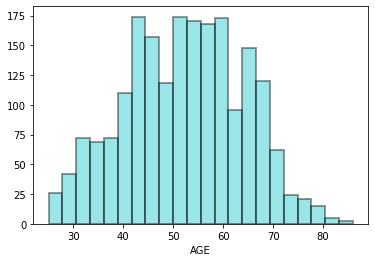

In [ ]:
sns.distplot(data['AGE'],
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')

In [ ]:
criminal_cases = data.groupby('PARTY')['Criminal'].sum().reset_index().sort_values('Criminal',ascending=False).head(30)
ax = px.bar(criminal_cases, x = 'PARTY',y = 'Criminal',color = 'PARTY', title='Total Criminal Cases by respective parties')
ax.show()

## Criminal Cases
1. BJP - 898 Cases
2. Congress - 734 Cases

In [ ]:
crime = data[data['WINNER']==1]
criminal_cases = crime.groupby('PARTY')['Criminal'].sum().reset_index().sort_values('Criminal',ascending=False).head(30)
ax = px.bar(criminal_cases, x = 'PARTY',y = 'Criminal',color = 'PARTY', title='Winning Parties with Number of Criminal Cases')
ax.show()

In [ ]:
## changing the datatype
data['GENDER'] = data['GENDER'].astype('category') 
data['WINNER'] = data['WINNER'].astype('category') 

In [ ]:
Female_winners = data[(data['WINNER']==1) & (data['GENDER']=='FEMALE')]
ax = px.histogram(Female_winners, 'STATE', title = 'Female Winners from different States')
ax.show()

### Highest number of Female winners were from West Bengal

In [ ]:
male_winners = data[(data['WINNER']==1) & (data['GENDER']=='MALE')]
ax = px.histogram(male_winners, 'STATE', title='Male Winners from different States')
ax.show()

In [ ]:
votes = data.groupby('STATE')['Total_votes'].sum().sort_values(ascending = False).reset_index()
ax = px.bar(votes,x = 'STATE',y = 'Total_votes',color='STATE', title='Total Votes cast State Wise')
ax.show()

### Total votes casted is highest in UP were the highest.

In [ ]:
category = data['CATEGORY'].value_counts().reset_index()
category.columns= ['CATEGORY','COUNT']
ax = px.bar(category,x = 'CATEGORY', y = 'COUNT', color = 'CATEGORY')
ax.show()

In [ ]:
df = data[data['WINNER']==1]
category = df['CATEGORY'].value_counts().reset_index()
category.columns= ['CATEGORY','COUNT']
ax = px.bar(category,x = 'CATEGORY', y = 'COUNT', color = 'CATEGORY', title='Winners from Various Categories')
ax.show()

### I Hope you find this Analysis useful for your Knowledge and understanding of Politics in India.

### Feel free to Input your thoughts on any graph or Data that you might have found interesting.